# Some Distributions and associated tests

When doing statistical testing, we first decide which distribution we're testing agaisnt and then apply the relevant statistical test.

# Binomial Distribution

[0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 0]
28


<AxesSubplot:>

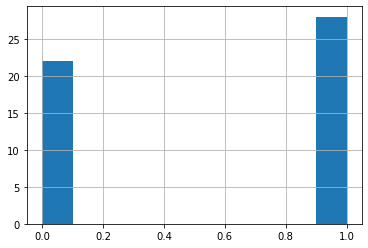

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns

dt = (np.random.rand(50) > 0.5).astype(int)
print(dt)
print(dt.sum())
pd.Series(dt).astype(int).hist()

### Testing from a binomial distribution

The binomial distribution depends on a single parameter (the probability $p$ of getting "heads").

Because of that, [we can test if a sample comes from](https://en.wikipedia.org/wiki/Binomial_test) a particular binomial distribution $p$ by looking only at number of trials and successes:

In [2]:
# Perform a test that the probability of success is p.
# This is an exact, two-sided test of the null hypothesis that 
# the probability of success in a Bernoulli experiment is p.
# (num_successes, num_trials, probability)
sc.stats.binom_test(30, 50, p=0.5)

0.20263875106454063

# Normal Distribution

The normal distribution is the most popular distribution. It's defined by two numbers: 

- The **mean**

- The **variance**

Other than that it's the classic "Bell Curve" (or Gaussian) that you know about.

# Central Limit Theorem

The normal distribution arises normally in many situations. One of the core ideas in statistics, the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) states that the average value of many observations (regardless of the original distribution they come from!) will be **normally distributed**. 

In mathematical terms, we say the **sampling distribution of the mean of any distribution is normally distributed**

We can see this by plotting the distribution of observed $p$ with 50 coinflips with probability $p=50$. They come from a binomial distribution yet generate a normal:

0.0528


<AxesSubplot:>

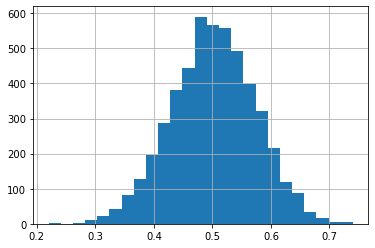

In [3]:
res = []
for i in range(5000):
    res.append((np.random.rand(50) > 0.5).mean())
res = pd.Series(res)
print((res > 0.6).sum() / len(res))
res.hist(bins=25)


# Testing if two samples come from the same normal

Let's make the Men and women distributions from random normal distribution draws:

<AxesSubplot:>

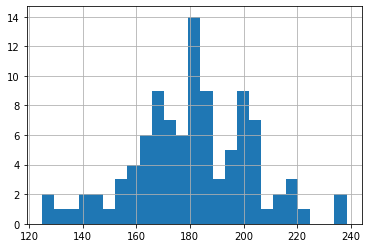

In [4]:
men = pd.Series(np.random.normal(180, scale=25.0, size=100))
women = pd.Series(np.random.normal(175, scale=25.0, size=100))
men.hist(bins=25)

<AxesSubplot:>

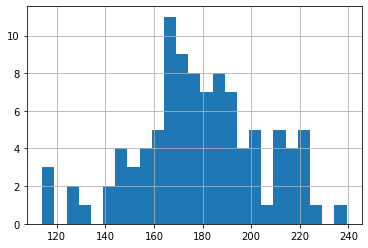

In [5]:
women.hist(bins=25)

The common test for normal distributions is the [Student's T-Test](https://en.wikipedia.org/wiki/Student%27s_t-test)

We can test with `scipy.stats.t-test`:

In [6]:
sc.stats.ttest_ind(women, men)

Ttest_indResult(statistic=-0.6649926710218349, pvalue=0.5068289903935637)

# A note about the scientific method

In Science, we try to disprove ideas. When ideas survive many rounds of attempts at disproving them, we start to think they might be good.

Because of this, the setup of a statistical test is a hypothesis that our idea is bad (often the **null hypothesis**, that some value is different than 0).

Then we try to reject the hypothesis (eg. the value is significantly different than 0). If the test fails, we say that we **fail to reject** the initial hypothesis.

# p-value

When we see a **p-value**, the interpretation, is the likelihood or a false positive or false negative (the odds that our result would be different than what we observed by random chance.

Generally we set a threshold (5% and 1% are common) at which we can be confident in the results of our test.

In [7]:
sc.stats.ttest_ind(women, men)

Ttest_indResult(statistic=-0.6649926710218349, pvalue=0.5068289903935637)

Here, there's about 50% odds that the difference is 0, so we **fail to reject** the null hypothesis -- men and women are the same

# PDF and CDF

When we see a distribution in a histogram plot like we did above, we are looking at the [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (or PDF) of the distribution in question. It maps any value to "how dense" the probability mass is at that point.

On the other hand, the normalized cumulative sum of a distribution is called the [Cumulative Distribution Function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) or CDF. Here are a few examples of CDF for the normal distribution with different parameters:

![](Normal_Distribution_CDF.svg.png)

The area under the CDF at any point tells you the probability of getting "this value or lower".

Text(0, 0.5, '$p$')

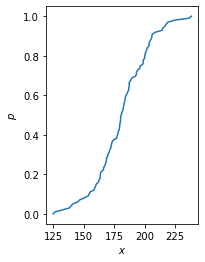

In [8]:
import matplotlib.pyplot as plt

cdf = men.sort_values()

# calculate the proportional values of samples
p = 1. * np.arange(len(cdf)) / (len(cdf) - 1)

# plot the sorted data:
fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(cdf, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')

You can remember we used the CDF of a lot of distributions of probabilities in previous workshops to do random draws

# Variance

variance is a statistical property of a vector. It's equal to:

$$var(x) = \dfrac{\sum (x_i - mean(x))^2}{n-1}$$

Variance tells you how "spread out" a vector is.

In [9]:
print(np.arange(10).var())
print((np.arange(10) * 3).var())
print((np.arange(10) / 3).var())

8.25
74.25
0.9166666666666667


# Standard deviation

Is just the square root of the variance.

# Covariance

Covariance is a measure of **joint variation** between two distributions.

$$cov(x, y) = \dfrac{\sum (x_i - mean(x))(y_i - mean(y))}{n-1}$$

Note that $cov(x, x) = var(x)$

![](400px-Covariance_trends.svg.png)

Generally this is seen in a **covariance Matrix** relating covariance between columns:

In [10]:
df = pd.DataFrame({
    'x' : np.arange(1000),
    'x2' : -np.arange(1000) / 3,
    'x3' : np.random.rand(1000),
    'x4' : np.random.rand(1000),
    'x5' : np.random.rand(1000) + np.arange(1000),   
})

df.cov()

,x,x2,x3,x4,x5
x,83416.666667,-27805.555556,-1.238344,2.957956,83417.344750
x2,-27805.555556,9268.518519,0.412781,-0.985985,-27805.781583
x3,-1.238344,0.412781,0.088133,-0.000076,-1.238078
x4,2.957956,-0.985985,-0.000076,0.085597,2.956497
x5,83417.344750,-27805.781583,-1.238078,2.956497,83418.108187


# Correlation

Is the analogue of standard deviation for covariance. The formula is:

$$cov(x, y) = \dfrac{\sum (x_i - mean(x))(y_i - mean(y))}{\sqrt{\sum (x_i - mean(x))^2(y_i - mean(y))^2}}$$

It generally tells you how closely tied two variables are

![](Correlation_examples2.svg.png)

Note that we generally use the correlation coefficient to analyze data, because it's easy to interpret:

- negative 1 is perfect negative correlation

- 0 is perfectly uncorrelated

- plus 1 is perfect correlation

In [11]:
df.corr()

,x,x2,x3,x4,x5
x,1.000000,-1.000000,-0.014443,0.035005,0.999999
x2,-1.000000,1.000000,0.014443,-0.035005,-0.999999
x3,-0.014443,0.014443,1.000000,-0.000875,-0.014439
x4,0.035005,-0.035005,-0.000875,1.000000,0.034988
x5,0.999999,-0.999999,-0.014439,0.034988,1.000000


# Geometric interpretation of correlation

Statistics and geometry are two views on the same mathematical principles! Correlation is tied to the angle between two vectors. 

- Vectors at a right angle to each other have correlation = 0

- Vectors overlaid on each other have correlation = 1

We can check this with the dot product between the vectors:

In [12]:
from itertools import combinations

for c1, c2 in list(combinations(list(df.columns), r=2)):
    print(f"{c1}, {c2} : {np.dot(df[c1], df[c2])}")

x, x2 : -110944500.0
x, x3 : 255228.79502517878
x, x4 : 262044.85636117405
x, x5 : 333086823.8432555
x2, x3 : -85076.26500839292
x2, x4 : -87348.28545372469
x2, x5 : -111028941.2810852
x3, x4 : 266.2473364413604
x3, x5 : 255488.76032987682
x4, x5 : 262305.7556196794
